## Importing  important library

In [8]:
import os
import pickle
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

NameError: name 'keras' is not defined

## Importing Data

In [44]:
data = pd.read_csv ('data_maize.csv')
print(data)

     Temperature  Rainfall  Humidity  pH  Contamination
0             25        96        29   7              0
1             28        55        47   3              0
2             29        83        41   3              0
3             28        79        38   3              0
4             25        77        37   5              1
..           ...       ...       ...  ..            ...
554           22       179        77   4              1
555           16       269        79   3              1
556           24       183        81   4              1
557           23       178        89   5              1
558           19       232        65   4              1

[559 rows x 5 columns]


## Visualizing data

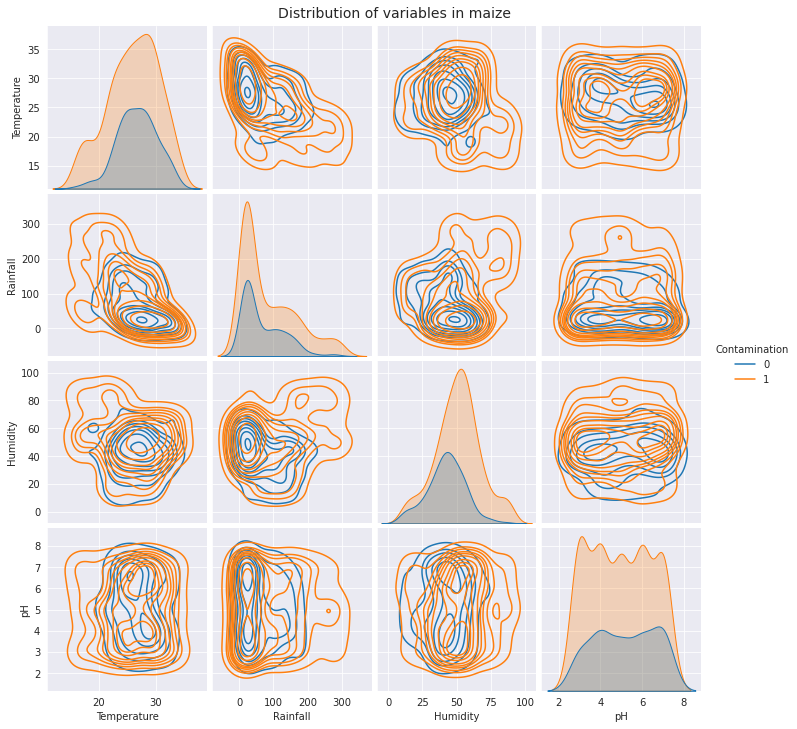

In [45]:
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid");
g=sns.pairplot(data, hue="Contamination",kind="kde");
g.fig.suptitle("Distribution of variables in maize",fontsize=14,y=1.01)
g.savefig('Prediction_1_1.PNG')

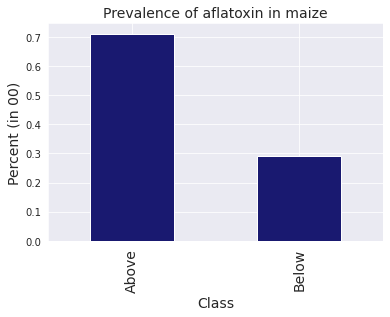

In [47]:
data['Contamination'].value_counts(normalize=True).plot(kind='bar',color="midnightblue")
plt.xticks([0, 1], ['Above','Below'],fontsize=14)  # Set text labels and properties.
plt.ylabel('Percent (in 00)',fontsize=14)
plt.xlabel('Class',fontsize=14)
plt.title("Prevalence of aflatoxin in maize", fontsize=14)
plt.savefig('Prediction_2_2.PNG',bbox_inches='tight')

## Splitting data to get training and testing data

In [48]:
train, test = train_test_split(data, test_size=0.20,random_state=1)
X_trainn=train[["Temperature","Rainfall", "Humidity", "pH"]]
y_train=train[["Contamination"]]
X_testt=test[["Temperature","Rainfall", "Humidity", "pH"]]
y_test=test[["Contamination"]]

## Standardizing data

We standardize data using StandardScaler() so that all data range from 0 to 1.

In [49]:
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(X_trainn)
X_train=scaler.transform(X_trainn)

scaler.fit(X_testt)
X_test=scaler.transform(X_testt)

## Building GPC model

In [50]:
model_1 = GaussianProcessClassifier(n_restarts_optimizer=20)

Fit the model

In [51]:
model_1.fit(X_train, y_train)
y_pred1= model_1.predict(X_train)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Making Prediction

In [52]:
y_pred= model_1.predict(X_test)
y_pred;

In [53]:
x=[[20,150,90,8],[30,10,100,5]]
y=model_1.predict(x)


for i in y:
    if i==1:
        print("Above")
    else:
        print("Below")

Below
Below


## Visulazing prediction results

Scatter plot

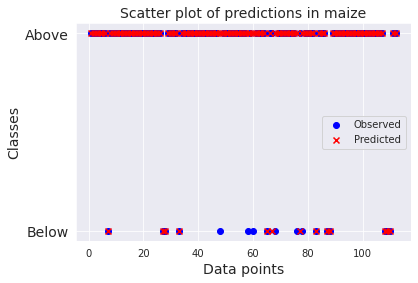

In [66]:
# Plot posteriors
n=np.size(y_test)
points=np.arange(1,n+1)
plt.figure()
plt.scatter(points,y_test, c="b", marker ="o", label="Observed")
plt.scatter(points,y_pred, c="r", marker ="x", label="Predicted")
#plt.title('Maize model scatter plot')
plt.xlabel("Data points",fontsize=14)
plt.ylabel("Classes",fontsize=14)
plt.legend(loc="best")
plt.title("Scatter plot of predictions in maize", fontsize=14)
plt.yticks([0, 1], ['Below', 'Above'],fontsize=14)  # Set text labels and properties.
plt.savefig('Prediction_3_3.PNG',bbox_inches='tight')


Confusion Matrix

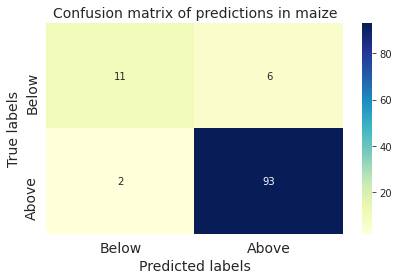

In [55]:
cm = confusion_matrix(y_test, y_pred)

# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
ax=sns.heatmap(cm,annot=True,cmap="YlGnBu")

# labels, title and ticks
# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=14);
ax.set_ylabel('True labels',fontsize=14);


ax.xaxis.set_ticklabels(['Below', 'Above'],fontsize=14); 
ax.yaxis.set_ticklabels(['Below', 'Above'],fontsize=14);

# saving confusion matrix in png form
plt.title("Confusion matrix of predictions in maize", fontsize=14)
plt.savefig('Prediction_4_4.PNG',bbox_inches='tight')
plt.tight_layout()


## Calculating performance measures

Printing the accuracy

In [56]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.928571
Precision: 0.939394
Recall: 0.978947
F1 score: 0.958763


In [57]:
# predict probabilities
probs = model_1.predict_proba(X_test)
probs=probs[:, 1]

# ROC Curves

In [58]:
# calculate AUC
auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' % auc)

AUC: 0.814


In [59]:
auc=round(auc,2)

In [60]:
# calculate roc curve for baseline
b_probs = [0 for _ in range(len(y_test))]
# calculate roc curve
b_fpr, b_tpr, thresholds = roc_curve(y_test, b_probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

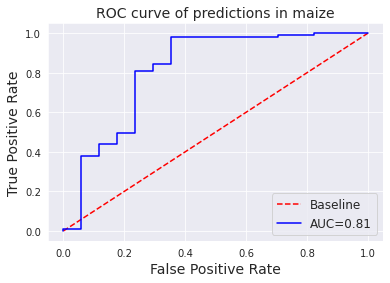

In [61]:

# plot the roc curve for the model
plt.plot(b_fpr, b_tpr, linestyle='--', label='Baseline', color="red")
plt.plot(fpr, tpr, label="AUC="+str(auc),color="blue")
#plt.title('Groundnuts model ROC curve')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.legend(loc="best",fontsize=12)
plt.title("ROC curve of predictions in maize", fontsize=14)
plt.savefig('Prediction_5_5.PNG',bbox_inches='tight')

In [62]:
# predict probabilities
y_prob = model_1.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]

# predict class values
y_pred = model_1.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
lr_auc=0.93;
#pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill',color="red")
pyplot.plot(lr_recall, lr_precision, marker='.', label='AUC='+str(lr_auc),color="blue")
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('Prediction_6_6.PNG', bbox_inches='tight')

TypeError: 'numpy.float64' object is not callable

In [63]:
# Save the model as serialized object pickle
with open('model_1.pkl', 'wb') as file:
    pickle.dump(model_1, file)

## Permutation feature importance

In [64]:
imps = permutation_importance(model_1, X_train, y_train)
print(imps.importances_mean)

[0.01163311 0.02192394 0.08143177 0.04519016]


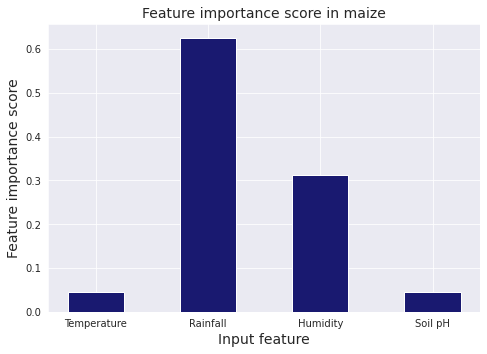

In [65]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
feature = ['Temperature', 'Rainfall', 'Humidity', 'Soil pH']
x=[0.044743, 0.626398, 0.313199, 0.044743]
ax.bar(feature,x, width=0.5,color="midnightblue")
#plt.title('Groungnuts Model Permutation Importances')
plt.xlabel("Input feature",fontsize=14)
plt.ylabel("Feature importance score",fontsize=14)
plt.title("Feature importance score in maize", fontsize=14)
plt.savefig('Prediction_7_7.PNG', bbox_inches='tight')

## Building LSTM model

We standardize data using MinMaxScaler() so that all data range from 0 to 1.

In [22]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

scaler.fit(X_test)
X_test=scaler.transform(X_test)

## Fitting the LSTM model

In [23]:
top_words=559
max_review_length=4
# create the model
embedding_vecor_length = 64
model = Sequential()

model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Bidirectional(LSTM(100, dropout=0.1, recurrent_dropout=0.1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 64)             35776     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 167,977
Trainable params: 167,977
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
7/7 [==============================] - 6s 112ms/step - loss: 0.6701 - accuracy: 0.6756 - val_loss: 0.5951 - val_accuracy: 0.8482
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 0.6427 - accuracy: 0.6756 - va

Epoch 53/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6281 - accuracy: 0.6756 - val_loss: 0.4911 - val_accuracy: 0.8482
Epoch 54/100
7/7 [==============================] - 0s 22ms/step - loss: 0.6277 - accuracy: 0.6756 - val_loss: 0.4949 - val_accuracy: 0.8482
Epoch 55/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6291 - accuracy: 0.6756 - val_loss: 0.5091 - val_accuracy: 0.8482
Epoch 56/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6273 - accuracy: 0.6756 - val_loss: 0.4908 - val_accuracy: 0.8482
Epoch 57/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6276 - accuracy: 0.6756 - val_loss: 0.4914 - val_accuracy: 0.8482
Epoch 58/100
7/7 [==============================] - 0s 21ms/step - loss: 0.6301 - accuracy: 0.6756 - val_loss: 0.4844 - val_accuracy: 0.8482
Epoch 59/100
7/7 [==============================] - 0s 20ms/step - loss: 0.6281 - accuracy: 0.6756 - val_loss: 0.5166 - val_accuracy: 0.8482
Epoch 60/100


## Making Prediction

In [24]:
y_pred = model.predict(X_test)
y_pred=np.round(y_pred)

4/4 [==============================] - 0s 3ms/step


## Visualizing Prediction Results

Scatter plot

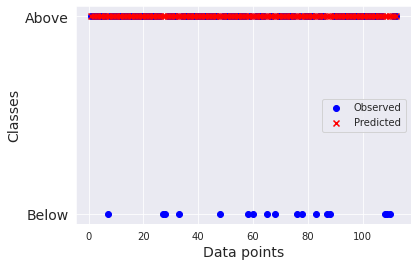

In [25]:
# Plot posteriors
n=np.size(y_test)
points=np.arange(1,n+1)
plt.figure()
plt.scatter(points,y_test, c="b", marker ="o", label="Observed")
plt.scatter(points,y_pred, c="r", marker ="x", label="Predicted")
#plt.title('Groundnuts model scatter plot')
plt.xlabel("Data points",fontsize=14)
plt.ylabel("Classes",fontsize=14)
plt.legend(loc="best")
plt.yticks([0, 1], ['Below', 'Above'],fontsize=14)  # Set text labels and properties.
plt.savefig('Prediction_8_8.PNG',bbox_inches='tight')

Confusion Matrix

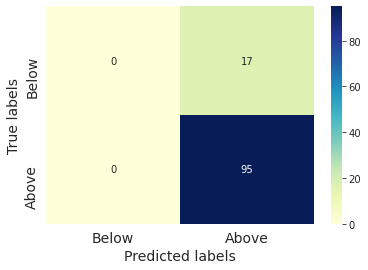

In [26]:
sns.set_style("darkgrid");
# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# If True, write the data value in each cell
ax=sns.heatmap(cm,annot=True,cmap="YlGnBu")

# labels, title and ticks
ax.set_xlabel('Predicted labels',fontsize=14);
ax.set_ylabel('True labels',fontsize=14); 
#ax.set_title('Confusion matrix for groundnuts model'); 
ax.xaxis.set_ticklabels(['Below', 'Above'],fontsize=14);
ax.yaxis.set_ticklabels(['Below', 'Above'],fontsize=14);
# saving confusion matrix in png form
plt.savefig('Prediction_9_9.PNG',bbox_inches='tight')

## Calculating prformance of the model

Printing the accuracy

In [27]:
y_pred=np.round(y_pred)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.848214
Precision: 0.848214
Recall: 1.000000
F1 score: 0.917874


## Accuracy and Loss curve

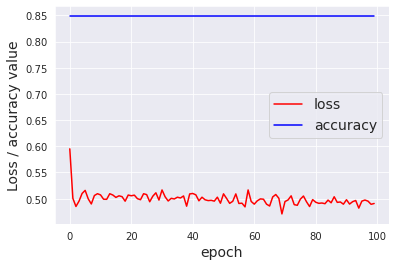

In [28]:
plt.plot(history.history['val_loss'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
#plt.title('Model loss vs accuracy')
plt.xlabel('epoch',fontsize=14)
plt.ylabel('Loss / accuracy value',fontsize=14)
plt.legend(['loss', 'accuracy'], loc='best',fontsize=14)
plt.savefig('Prediction_10_10.PNG',bbox_inches='tight')